Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

Step 1. Import the necessary libraries 
Step 2. Import the dataset from this address (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)
Step 3. Assign it to a variable called users

In [2]:
import numpy as np  # Import Numpy library & use the std abbreviation "np"
import pandas as pd # Import Pandas library & use the std abbreviation "pd"

# Read in a CSV file from the specified URL and use "|" as a separator
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|')

# Display the initial 5 rows of the user Data Frame
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
#Discover what is the mean age per Occupation
users.groupby('occupation').mean()

,user_id,age
occupation,,
administrator,430.949367,38.746835
artist,451.892857,31.392857
doctor,533.714286,43.571429
educator,466.905263,42.010526
engineer,456.328358,36.388060
entertainment,398.000000,29.222222
executive,422.312500,38.718750
healthcare,501.437500,41.562500
homemaker,443.000000,32.571429


In [11]:
#Discover the Male ratio per occupation and sort it from the most to the least
# Create a new Data Frame called "users_male" that includes only rows where the 'gender' column is 'M'
users_male = users[users['gender'] == 'M']

# Group the users_male DataFrame by occupation and count the number of male users in each occupation
male_count_by_occupation = users_male.groupby('occupation')['gender'].count()
# Group the original users DataFrame by occupation and count the total number of users in each occupation
total_count_by_occupation = users.groupby('occupation')['gender'].count()

# Calculate the male ratio for each occupation by dividing male_count_by_occupation by total_count_by_occupation
male_ratio_by_occupation = male_count_by_occupation / total_count_by_occupation

# Sort the male_ratio_by_occupation Series in descending order of the male ratio
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)

# Print the resulting male ratio by occupation DataFrame
print(male_ratio_by_occupation)


occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [12]:
# Group the users DataFrame by occupation
users_by_occupation = users.groupby('occupation')

# Calculate the minimum and maximum ages for each occupation using the agg() method
min_max_age_by_occupation = users_by_occupation['age'].agg(['min', 'max'])

# Print the resulting DataFrame
print(min_max_age_by_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [13]:
# Group the users DataFrame by occupation and gender
users_by_occupation_gender = users.groupby(['occupation', 'gender'])

# Calculate the mean age for each combination of occupation and gender using the agg() method
mean_age_by_occupation_gender = users_by_occupation_gender['age'].mean()

# Print the resulting DataFrame
print(mean_age_by_occupation_gender)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [14]:
# Group the users DataFrame by occupation and gender
users_by_occupation_gender = users.groupby(['occupation', 'gender'])

# Count the number of users for each combination of occupation and gender
count_by_occupation_gender = users_by_occupation_gender['gender'].count()

# Calculate the total number of users for each occupation
total_by_occupation = count_by_occupation_gender.groupby('occupation').sum()

# Calculate the percentage of users for each combination of occupation and gender
percentage_by_occupation_gender = (count_by_occupation_gender / total_by_occupation) * 100

# Print the resulting DataFrame
print(percentage_by_occupation_gender)

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12

In [15]:
import numpy as np
import pandas as pd
import random

euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [16]:
goal_column = euro12['Goals']
print(goal_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [17]:
goal_column = euro12['Goals']
print(goal_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [18]:
#How many team participated in the Euro2012?
num_teams = len(euro12['Team'].unique())
print("Number of teams in Euro2012: ", num_teams)

Number of teams in Euro2012:  16


In [19]:
num_columns = len(euro12.columns)
print("Number of columns in the Euro2012 dataset: ", num_columns)

Number of columns in the Euro2012 dataset:  35


In [20]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [22]:
sortByRed=discipline.sort_values("Red Cards")
sortByYellow=sortByRed.sort_values("Yellow Cards")
sortByYellow

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
11,Republic of Ireland,6,1
1,Czech Republic,7,0
14,Sweden,7,0


In [23]:
mean_yellow_cards = euro12.groupby('Team')['Yellow Cards'].mean()
print(mean_yellow_cards)

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64


In [25]:
high_scoring_teams = euro12[euro12['Goals'] > 6]
print(high_scoring_teams[['Team']])

       Team
5   Germany
13    Spain


In [26]:
g_teams = euro12[euro12['Team'].str.startswith('G')]
print(g_teams['Team'])

5    Germany
6     Greece
Name: Team, dtype: object


In [28]:
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [30]:
euro12.iloc[:-3,:]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [31]:
teams = ['England', 'Italy', 'Russia']
shooting_accuracy = euro12.loc[euro12['Team'].isin(teams), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299 

In [34]:
import pandas as pd
import numpy as np
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [36]:
dataFrame = pd.DataFrame({'bedrs':s1, 'bathrs': s2,'price_sqr_meter': s3})
dataFrame

,bedrs,bathrs,price_sqr_meter
0,1.147098,1.530251,14539.634921
1,1.968882,2.015740,19264.831293
2,3.313636,2.019948,18529.984049
3,3.746648,2.130428,29725.755875
4,3.341888,1.105575,22191.030174
...,...,...,...
95,1.479732,1.897502,18822.420359
96,1.482097,2.397432,12144.685796
97,3.883551,1.760901,15034.558053
98,2.871240,2.179367,27093.572218


In [40]:
 dataFrame1= pd.Series({'bigcolumn':dataFrame.values})
 dataFrame1

bigcolumn    [[1.1470980134595576, 1.5302509822511596, 1453...
dtype: object

In [41]:
print(bigcolumn.index.max() == 99)

False


In [50]:
dataFrame1.bigcolumn[100]

IndexError: index 100 is out of bounds for axis 0 with size 100

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [80]:
#step 1
import numpy as np
import pandas as pd
import datetime as dt

#step 2
data=pd.read_fwf('wind.txt')

In [81]:
#step 3
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [82]:
#Step 4
data["Date"] = data["Date"].apply(lambda x: x - datetime.timedelta(days=36525) if x.year < 2000 else x)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [83]:
#step 5
data = data.set_index("Date")
data.index.astype("datetime64[ns]")

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1878-12-21', '1878-12-22', '1878-12-23', '1878-12-24',
               '1878-12-25', '1878-12-26', '1878-12-27', '1878-12-28',
               '1878-12-29', '1878-12-30'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [96]:
#step 6
data.isnull().values.ravel().sum()

31

In [97]:
#step 7
np.prod(data.shape) - data.isnull().sum().sum()

78857

In [98]:
#step 8
data.mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [99]:
#step 9
def stats(stats):
    stats = pd.Series(stats)
    Min = stats.min()
    Max = stats.max()
    Mean = stats.mean()
    Std = stats.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = data.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
Std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [101]:
#step 10
day_stats = data.apply(stats,axis=1)
day_stats.head()

,Min,Max,Mean,Std
Date,,,,
2061-01-01,9.29,18.50,13.018182,2.808875
2061-01-02,6.50,17.54,11.336364,3.188994
2061-01-03,6.17,18.50,11.641818,3.681912
2061-01-04,1.79,11.75,6.619167,3.198126
2061-01-05,6.17,13.33,10.630000,2.445356


In [91]:
#step 11
january_data = data[data.index.month == 1]
january_data.mean()

RPT    14.841113
VAL    12.921149
ROS    13.292993
KIL     7.212043
SHA    11.675450
BIR     8.054158
DUB    11.823692
CLA     9.536732
MUL     9.546631
CLO    10.064695
BEL    14.568638
MAL    18.017778
dtype: float64

In [92]:
#step 12
data.resample('A').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1872-12-31,16.500000,15.920000,14.620000,7.410000,8.290000,11.210000,13.540000,7.790000,10.460000,10.790000,13.370000,9.710000
1873-12-31,11.846849,10.682192,10.684493,5.554274,9.661534,6.549425,8.471151,7.630027,8.254767,7.828493,12.180219,15.483781
1874-12-31,13.617973,11.803562,12.323233,6.415288,11.102082,6.793671,10.080712,9.884438,9.319315,8.704877,13.226932,16.910247
1875-12-31,12.020356,10.305151,11.574411,5.276055,9.201151,5.680986,8.576438,7.844055,8.808466,7.384411,12.641726,15.316986
1876-12-31,11.742486,10.187404,10.776038,5.112514,8.826311,6.305328,9.142514,7.137568,8.872432,7.891967,12.341940,15.500792
...,...,...,...,...,...,...,...,...,...,...,...,...
2068-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
2069-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
2070-12-31,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027


In [93]:
#step 13
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1872-12-31,16.500000,15.920000,14.620000,7.410000,8.290000,11.210000,13.540000,7.790000,10.460000,10.790000,13.370000,9.710000
1873-01-31,13.122581,12.087097,10.604516,5.430645,9.394516,7.270323,10.560000,7.833226,8.596129,7.444839,11.965161,14.673871
1873-02-28,14.519643,13.230714,10.405000,6.762500,12.163214,7.824286,11.141429,9.121786,10.957857,9.152500,15.165714,19.214286
1873-03-31,11.827097,11.768387,10.743226,5.570323,9.470323,6.249677,8.338065,8.073226,8.298710,7.802258,12.157097,15.441613
1873-04-30,13.644667,11.566000,13.139333,7.392000,10.102667,8.068667,10.874333,8.902000,10.014333,9.904000,12.920333,16.696000
...,...,...,...,...,...,...,...,...,...,...,...,...
2072-08-31,9.822581,6.824194,9.757097,4.443871,6.490323,4.565484,8.524194,5.536452,7.302581,5.746774,9.592258,12.696452
2072-09-30,9.247333,7.534000,10.230667,3.791667,5.322333,3.580333,6.846333,5.241000,5.628000,4.171667,9.379000,10.560000
2072-10-31,11.489677,9.816774,11.952903,5.230968,7.185484,5.014516,9.021290,7.967097,7.726129,6.436774,11.919677,14.347742


In [94]:
#step 14
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1873-01-05,9.925000,9.630000,9.541667,3.700000,5.368333,4.853333,7.520000,4.306667,5.951667,4.353333,6.941667,7.403333
1873-01-12,13.904286,11.398571,11.804286,5.191429,8.552857,7.280000,8.387143,7.132857,7.058571,6.241429,9.297143,12.028571
1873-01-19,14.597143,13.052857,13.001429,7.375714,11.457143,8.930000,13.690000,8.661429,10.301429,10.492857,14.445714,20.247143
1873-01-26,13.237143,13.900000,10.120000,5.005714,10.910000,8.090000,12.111429,9.755714,10.000000,8.065714,15.240000,17.631429
1873-02-02,12.612857,11.441429,7.697143,5.281429,8.808571,6.402857,9.578571,8.054286,8.631429,7.575714,13.418571,12.998571
...,...,...,...,...,...,...,...,...,...,...,...,...
2072-12-04,15.422857,17.060000,12.874286,7.344286,11.495714,9.650000,14.695714,10.345714,10.357143,9.695714,16.191429,19.784286
2072-12-11,16.608571,16.554286,13.665714,6.861429,12.411429,10.328571,14.790000,10.678571,10.214286,10.210000,17.547143,19.607143
2072-12-18,17.917143,19.572857,16.711429,10.804286,14.940000,12.778571,15.614286,14.367143,12.125714,11.751429,20.471429,23.408571


In [95]:
#step 15
first_year = data[data.index.year == 1961]
stats1 = data.resample('W').mean().apply(lambda x: x.describe())
stats1

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,12.372341,10.653926,11.675769,6.312001,10.458270,7.096257,9.807524,8.499372,8.498262,8.711043,13.123306,15.600667
std,3.454963,3.388531,2.881194,2.208640,3.170923,2.555636,3.352493,2.852802,2.656636,2.939030,3.772985,4.507029
min,3.928571,2.644286,4.687143,1.202857,2.751429,1.310000,2.550000,2.242857,2.445714,1.477143,3.208571,5.088571
25%,9.940000,8.382857,9.685714,4.732857,8.328571,5.234286,7.381429,6.421429,6.542857,6.582857,10.225714,12.238571
50%,12.101429,10.434286,11.552857,6.105714,10.272857,6.970000,9.510000,8.320000,8.340000,8.535714,12.797143,15.302857
75%,14.670000,12.850000,13.392857,7.630000,12.464286,8.750000,12.030000,10.314286,10.160000,10.638571,15.614286,18.727143
max,23.081429,23.304286,27.290000,13.930000,22.480000,15.408571,20.308571,17.540000,17.495714,18.150000,26.552857,30.577143


Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [132]:
import numpy as np #np is the standard convention for Numpy
import pandas as pd
import random
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv",sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [104]:
#step 4
Rows = chipo.head(10)
Rows

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [105]:
#step 5
observationCount = chipo.shape
observationCount

(4622, 5)

In [106]:
#step 6
numberOfColumns = chipo.shape[1]
numberOfColumns

5

In [107]:
#step 7
for col in chipo.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


In [110]:
#step 8
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t', index_col="order_id")
dataset = data[["item_name", "quantity", "choice_description", "item_price"]]
dataset

,item_name,quantity,choice_description,item_price
order_id,,,,
1,Chips and Fresh Tomato Salsa,1,NaN,$2.39
1,Izze,1,[Clementine],$3.39
1,Nantucket Nectar,1,[Apple],$3.39
1,Chips and Tomatillo-Green Chili Salsa,1,NaN,$2.39
2,Chicken Bowl,2,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...
1833,Steak Burrito,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
1833,Steak Burrito,1,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
1834,Chicken Salad Bowl,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25


In [112]:
#step 9
a=chipo.groupby('item_name').sum().sort_values(by=['quantity'], ascending=False)
a.T.columns[0]

'Chicken Bowl'

In [116]:
#step 10
chipo.groupby(by="item_name").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [115]:
#step 11
chipo.groupby(by="choice_description").sum().sort_values('quantity',ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [118]:
#step 12
chipo.quantity.sum()

4972

In [133]:
def num_float(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(num_float)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [134]:
chipo.item_price.dtype

dtype('float64')

In [135]:
#step 14
(chipo['item_price']*chipo['quantity']).sum()

39237.02

In [136]:
#step 15
chipo.order_id.value_counts().count()

1834

In [137]:
#step 16
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.394231188658654

In [138]:
#step 17
chipo.item_name.value_counts().count()

50

Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

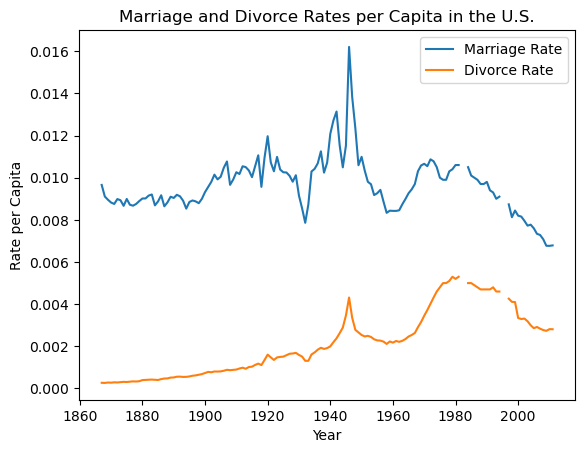

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Set the date column as the index and calculate the marriage and divorce rates per capita
data = data.set_index('Year')
data['Marriage Rate'] = data['Marriages'] / data['Population']
data['Divorce Rate'] = data['Divorces'] / data['Population']

# Create a line plot
plt.plot(data.index, data['Marriage Rate'], label='Marriage Rate')
plt.plot(data.index, data['Divorce Rate'], label='Divorce Rate')

# Add title, labels and legend
plt.title('Marriage and Divorce Rates per Capita in the U.S.')
plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.legend()

# Show the plot
plt.show()

Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

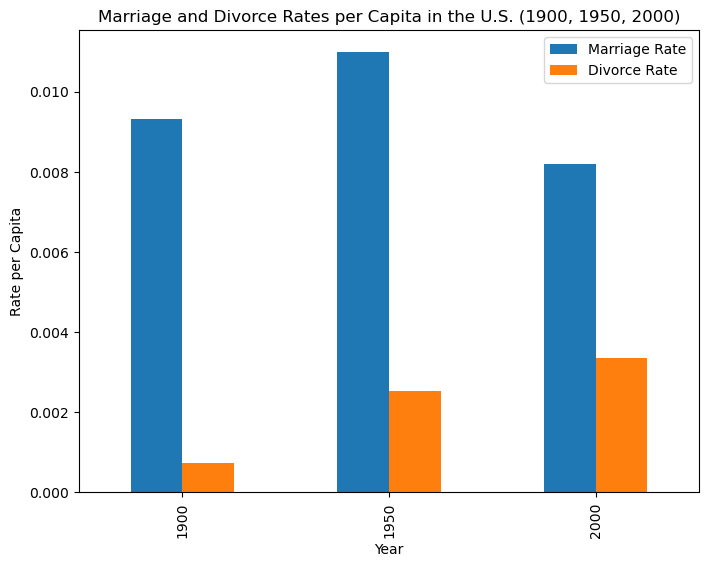

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Filter the data for years 1900, 1950 and 2000
years = [1900, 1950, 2000]
data = data[data['Year'].isin(years)]
data = data.set_index('Year')

# Calculate the marriage and divorce rates per capita
data['Marriage Rate'] = data['Marriages'] / data['Population']
data['Divorce Rate'] = data['Divorces'] / data['Population']

# Create a bar chart
ax = data[['Marriage Rate', 'Divorce Rate']].plot(kind='bar', figsize=(8,6))

# Add title, labels and legend
plt.title('Marriage and Divorce Rates per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.legend()

# Show the plot
plt.show()

Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

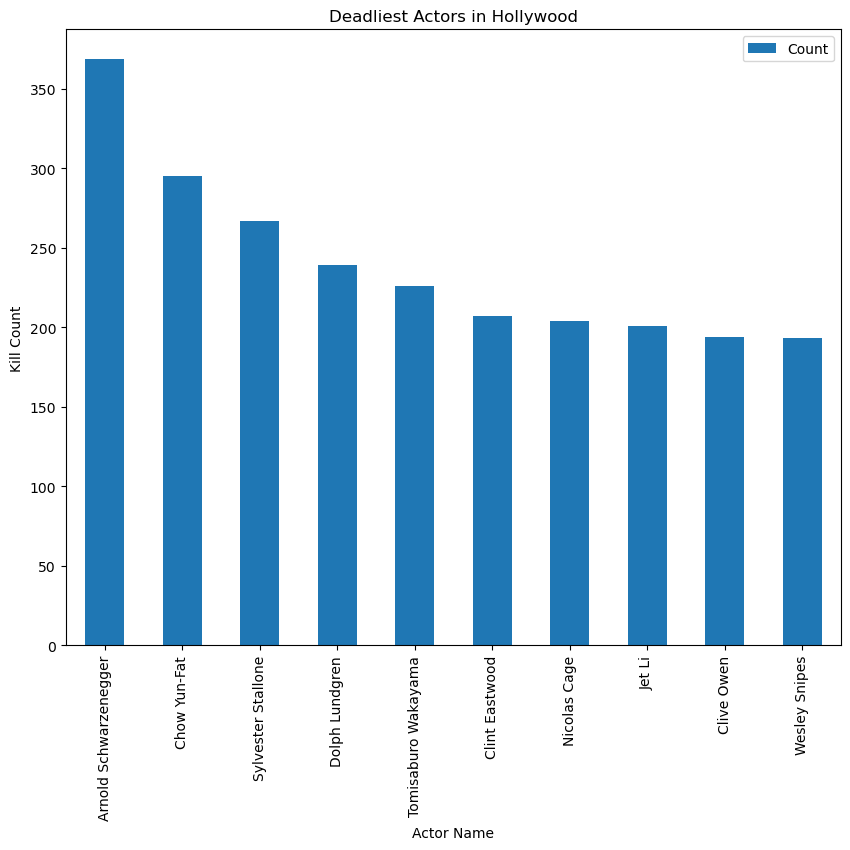

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('actor_kill_counts.csv')

# Group the data by actor and sum the kill count
data_grouped = data.groupby('Actor').sum().sort_values(by='Count', ascending=False)

# Create a bar chart
ax = data_grouped.plot(kind='bar', figsize=(10,8))

# Add title and labels
plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Actor Name')
plt.ylabel('Kill Count')

# Show the plot
plt.show()

Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

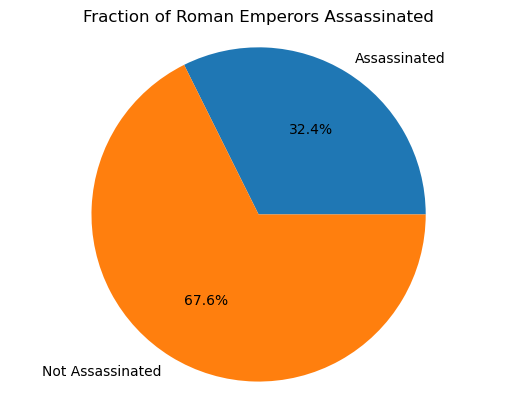

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('roman-emperor-reigns.csv')

# count the number of emperors assassinated and not assassinated
num_assassinated = len(data[data['Cause_of_Death'] == 'Assassinated'])
num_not_assassinated = len(data) - num_assassinated

# create a pie chart
plt.pie([num_assassinated, num_not_assassinated], labels=['Assassinated', 'Not Assassinated'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

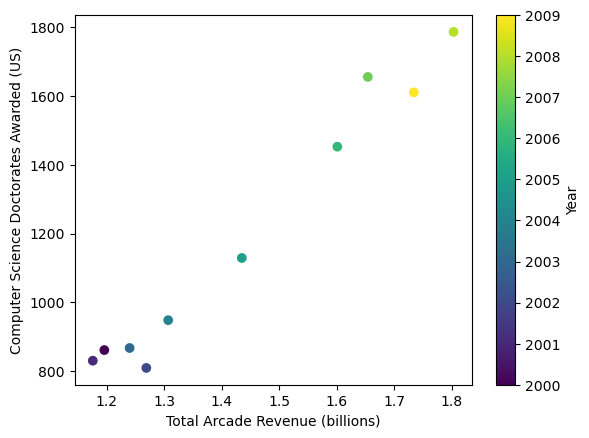

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Create scatter plot
plt.scatter(data["Total Arcade Revenue (in billions)"], data["Computer Science Doctorates Awarded in US"], c=data["Year"], cmap='viridis')

# Set labels for the axes
plt.xlabel("Total Arcade Revenue (in billions)")
plt.ylabel("Computer Science Doctorates Awarded in US")

# Show the colorbar and set its label
cbar = plt.colorbar()
cbar.ax.set_ylabel("Year")

# Show the plot
plt.show()